In [8]:
import pandas as pd
import numpy as np
file_path = "/content/weather_2020-11.csv"
data = pd.read_csv(file_path)

data['ParameterValue'] = pd.to_numeric(data['ParameterValue'], errors='coerce')
data = data.dropna(subset=['ParameterValue'])

relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
relevant_data = data[data['ParameterName'].isin(relevant_parameters)]

average_values = relevant_data.pivot_table(index='ParameterName', values='ParameterValue', aggfunc=np.mean)

print("Average values:")
print(average_values)


Average values:
               ParameterValue
ParameterName                
PA_PT1H_AVG       1012.634146
RH_PT1H_AVG         87.901387
TA_PT1H_AVG          2.740029
WS_PT1H_AVG          3.900717


In [9]:
parameters = data['ParameterName'].unique()

min_values = []
max_values = []
median_values = []
hour_with_highest_values = []

for parameter in parameters:
    parameter_data = data[data['ParameterName'] == parameter]

    parameter_values = parameter_data['ParameterValue'].values

    min_value = np.min(parameter_values)
    max_value = np.max(parameter_values)
    median_value = np.median(parameter_values)

    max_hour_index = np.argmax(parameter_values)
    hour_with_highest_value = parameter_data.iloc[max_hour_index]['Time']

    min_values.append(min_value)
    max_values.append(max_value)
    median_values.append(median_value)
    hour_with_highest_values.append(hour_with_highest_value)

min_values = np.array(min_values)
max_values = np.array(max_values)
median_values = np.array(median_values)

for i, parameter in enumerate(parameters):
    print(f"Parameter: {parameter}")
    print(f"Minimum Value: {min_values[i]}")
    print(f"Maximum Value: {max_values[i]}")
    print(f"Median Value: {median_values[i]}")
    print(f"Hour with Highest Value: {hour_with_highest_values[i]}")
    print()



Parameter: TA_PT1H_AVG
Minimum Value: -8.4
Maximum Value: 10.9
Median Value: 2.8
Hour with Highest Value: 2020-11-03T06:00:00Z

Parameter: TA_PT1H_MAX
Minimum Value: -7.8
Maximum Value: 11.1
Median Value: 3.0
Hour with Highest Value: 2020-11-03T06:00:00Z

Parameter: TA_PT1H_MIN
Minimum Value: -9.1
Maximum Value: 10.9
Median Value: 2.5
Hour with Highest Value: 2020-11-03T06:00:00Z

Parameter: RH_PT1H_AVG
Minimum Value: 61.0
Maximum Value: 100.0
Median Value: 89.0
Hour with Highest Value: 2020-11-12T13:00:00Z

Parameter: WS_PT1H_AVG
Minimum Value: 0.4
Maximum Value: 10.3
Median Value: 3.7
Hour with Highest Value: 2020-11-02T12:00:00Z

Parameter: WS_PT1H_MAX
Minimum Value: 0.7
Maximum Value: 12.3
Median Value: 4.4
Hour with Highest Value: 2020-11-02T14:00:00Z

Parameter: WS_PT1H_MIN
Minimum Value: 0.1
Maximum Value: 9.5
Median Value: 3.1
Hour with Highest Value: 2020-11-02T12:00:00Z

Parameter: WD_PT1H_AVG
Minimum Value: 4.0
Maximum Value: 359.0
Median Value: 188.0
Hour with Highest Value

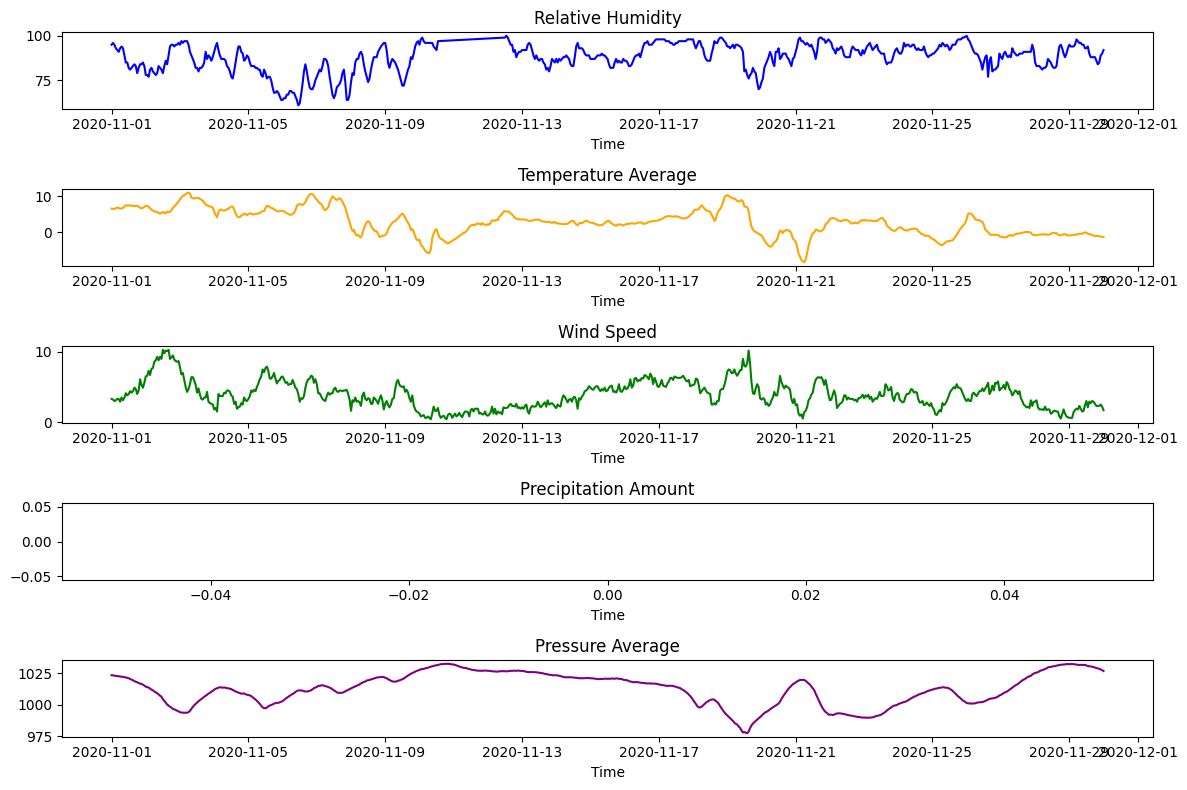

In [10]:
import matplotlib.pyplot as plt
data['Time'] = pd.to_datetime(data['Time'])

rh_data = data[data['ParameterName'] == 'RH_PT1H_AVG']
ta_data = data[data['ParameterName'] == 'TA_PT1H_AVG']
ws_data = data[data['ParameterName'] == 'WS_PT1H_AVG']
pra_data = data[data['ParameterName'] == 'PRA_PT1H_ACC']
pa_data = data[data['ParameterName'] == 'PA_PT1H_AVG']

plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(rh_data['Time'], rh_data['ParameterValue'], color='blue')
plt.title('Relative Humidity')
plt.xlabel('Time')

plt.subplot(5, 1, 2)
plt.plot(ta_data['Time'], ta_data['ParameterValue'], color='orange')
plt.title('Temperature Average')
plt.xlabel('Time')

plt.subplot(5, 1, 3)
plt.plot(ws_data['Time'], ws_data['ParameterValue'], color='green')
plt.title('Wind Speed')
plt.xlabel('Time')

plt.subplot(5, 1, 4)
plt.plot(pra_data['Time'], pra_data['ParameterValue'], color='red')
plt.title('Precipitation Amount')
plt.xlabel('Time')

plt.subplot(5, 1, 5)
plt.plot(pa_data['Time'], pa_data['ParameterValue'], color='purple')
plt.title('Pressure Average')
plt.xlabel('Time')

plt.tight_layout()
plt.show()


In [11]:
relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
filtered_data = data[data['ParameterName'].isin(relevant_parameters)]

filtered_data['ParameterValue'] = pd.to_numeric(filtered_data['ParameterValue'], errors='coerce')

pivot_data = filtered_data.pivot_table(index='Time', columns='ParameterName', values='ParameterValue', aggfunc='mean')

average_values = pivot_data.mean()
min_values = pivot_data.min()
max_values = pivot_data.max()
median_values = pivot_data.median()
hour_with_highest_value = pivot_data.idxmax()

with open('/content/exrc-01-answer.txt', 'w') as f:
    f.write(f"relative_humidity={average_values['RH_PT1H_AVG']}\n")
    f.write(f"temperature_average={average_values['TA_PT1H_AVG']}\n")
    f.write(f"wind_speed={average_values['WS_PT1H_AVG']}\n")
    f.write(f"pressure_verage={average_values['PA_PT1H_AVG']}\n")


<ipython-input-11-984faa6c3759>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ParameterValue'] = pd.to_numeric(filtered_data['ParameterValue'], errors='coerce')
